In [1]:
# It's only change jupyter themes
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('onedork')

## Write Code in Empty cells don't use existing cells otherwise output will be earesed use new cells to write code

#### Import Related Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

download data set from this link

[h1b.csv](https://drive.google.com/file/d/1GHotByxQaCXKPAuNI7dqIMiOMdmnkOzN/view?usp=sharing)

### read csv in Pandas DataFrame 

In [3]:
df = pd.read_csv("h1b.csv")

In [4]:
df

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003
...,...,...,...,...,...,...,...,...,...,...,...
3002453,3002454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NYC, NEW YORK",-74.005941,40.712784
3002454,3002455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SOUTH LAKE, TEXAS",-97.134178,32.941236
3002455,3002456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CLINTON, NEW JERSEY",-74.909890,40.636768
3002456,3002457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"OWINGS MILL, MARYLAND",-76.780253,39.419550


### show columns

In [5]:
df.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

### delete 'unnamed:0'  column from data set

In [6]:

df.drop("Unnamed: 0", axis=1, inplace=True)

In [7]:
df.columns

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

## check no of rows in data frame

In [22]:
df.shape[0]

3002458

## Drop All rows which has any NA value and show first 5 rows after this operation

In [8]:
df.isna().sum()

CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64

In [9]:
def drop_na_percent(df):
    na_values = df.isna().sum()
    frac_na_values = na_values / df.shape[0]
    # NA values / total rows
    return frac_na_values*100

In [10]:
drop_na_percent(df)

CASE_STATUS           0.000433
EMPLOYER_NAME         0.001965
SOC_NAME              0.590649
JOB_TITLE             0.001432
FULL_TIME_POSITION    0.000500
PREVAILING_WAGE       0.002831
YEAR                  0.000433
WORKSITE              0.000000
lon                   3.571807
lat                   3.571807
dtype: float64

In [11]:
df.dropna(axis=0, how="any", inplace=True)

In [12]:
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


## reset index and check how many rows you have 

In [13]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df.shape[0]

2877765

In [14]:
len(df.index)

2877765

## Write a code to find out top 15 hiring company (Employer Name) 

In [15]:
df["EMPLOYER_NAME"].value_counts(ascending=True)[:2]

J. LOGAN INTERIORS                      1
INTEGRATED HEALTHCARE HOLDINGS, INC.    1
Name: EMPLOYER_NAME, dtype: int64

In [16]:
df[["EMPLOYER_NAME"]].value_counts().head(15)

EMPLOYER_NAME                                  
INFOSYS LIMITED                                    130257
TATA CONSULTANCY SERVICES LIMITED                   64273
WIPRO LIMITED                                       45673
DELOITTE CONSULTING LLP                             35999
IBM INDIA PRIVATE LIMITED                           33585
ACCENTURE LLP                                       33226
MICROSOFT CORPORATION                               25551
HCL AMERICA, INC.                                   22488
ERNST & YOUNG U.S. LLP                              18094
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     17322
CAPGEMINI AMERICA INC                               16628
GOOGLE INC.                                         16425
LARSEN & TOUBRO INFOTECH LIMITED                    14318
IGATE TECHNOLOGIES INC.                             12327
IBM CORPORATION                                     11976
dtype: int64

In [17]:
Emp_name =  df[["EMPLOYER_NAME"]].value_counts().head(15)

In [18]:
import matplotlib as matplotlib

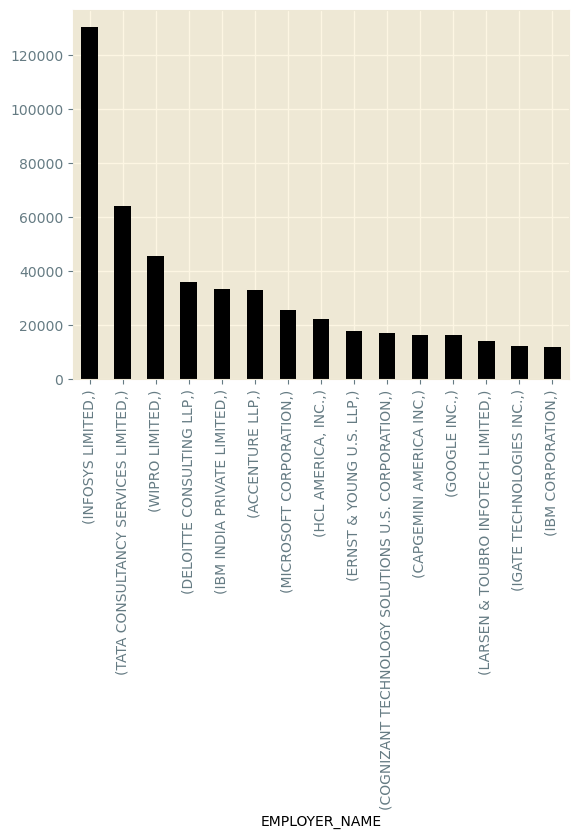

In [19]:
plt.style.use("Solarize_Light2")
fig = plt.figure(facecolor='white')
Emp_name.plot(kind="bar", facecolor="black")
plt.show()

### Top 15 companies which provide highest PREVALING WAGE

In [20]:
df["PREVAILING_WAGE"].describe()

count    2.877765e+06
mean     1.451666e+05
std      5.307856e+06
min      0.000000e+00
25%      5.460000e+04
50%      6.512500e+04
75%      8.151500e+04
max      6.997607e+09
Name: PREVAILING_WAGE, dtype: float64

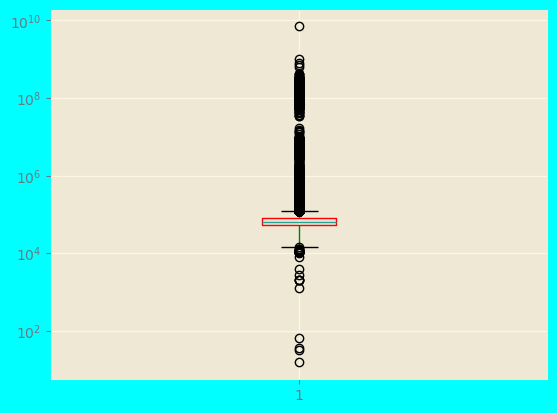

In [21]:
fig = plt.figure(facecolor='cyan')
plt.boxplot(df["PREVAILING_WAGE"], boxprops=dict(color='red'), whiskerprops=dict(color='green'))
plt.yscale("log")
plt.show()


In [22]:
df.groupby("EMPLOYER_NAME")["PREVAILING_WAGE"].median().sort_values(ascending=False)[:15]

EMPLOYER_NAME
BAALAAJEE INC.                                 215109440.0
OMPI OF AMERICA INC.                           212987840.0
INNOBOX SYSTEMS                                172363360.0
DEPARTMENT OF VETERANS AFFAIRS/NMVAHCS         134702089.5
MANHATTAN SOFTWARE, INC.                       123907680.0
GYM-PACT CORP                                  123389760.0
BOOKRENTER.COM, INC.                           123032124.8
CATANIA, MAHON, MILLIGRAM &AMP; RIDER, PLLC    122697120.0
AGROPLASMA, INC                                122133440.0
AQUA LUNG AMERICA INC.                         118110720.0
AV INVESTMENT COMPANY, INC.                    115903840.0
BRONX LIGHTHOUSE CHARTER SCHOOL                112424000.0
TAMPA BAY DIGITAL DESIGN EXPERTS, LLC          107043518.4
XANTREX TECHNOLOGY, INC.                       101957554.5
PETRO MANAGEMENT INC.                          101920000.0
Name: PREVAILING_WAGE, dtype: float64

In [23]:
df.groupby("EMPLOYER_NAME")["PREVAILING_WAGE"].mean().sort_values(ascending=False)[:15]

EMPLOYER_NAME
OMPI OF AMERICA INC.                           2.129878e+08
INNOBOX SYSTEMS                                1.723634e+08
BAALAAJEE INC.                                 1.434408e+08
DEPARTMENT OF VETERANS AFFAIRS/NMVAHCS         1.347021e+08
BAYSHORE GLOBAL MANAGEMENT LLC                 1.262358e+08
MANHATTAN SOFTWARE, INC.                       1.239077e+08
GYM-PACT CORP                                  1.233898e+08
BOOKRENTER.COM, INC.                           1.230321e+08
CATANIA, MAHON, MILLIGRAM &AMP; RIDER, PLLC    1.226971e+08
AGROPLASMA, INC                                1.221334e+08
AQUA LUNG AMERICA INC.                         1.181107e+08
AV INVESTMENT COMPANY, INC.                    1.159038e+08
BRONX LIGHTHOUSE CHARTER SCHOOL                1.124240e+08
E AND D MEDIA INC.                             1.098240e+08
TAMPA BAY DIGITAL DESIGN EXPERTS, LLC          1.070435e+08
Name: PREVAILING_WAGE, dtype: float64

In [24]:
df["PREVAILING_WAGE"].value_counts().head(5)

60000.0    10185
55245.0     6745
62566.0     6480
58053.0     5683
52499.0     5492
Name: PREVAILING_WAGE, dtype: int64

##### Average PREVAILING WAGE

In [25]:
df["PREVAILING_WAGE"].value_counts(ascending=True).iloc[:5]
# Outliers 

137017920.0    1
174093920.0    1
46703.0        1
62431.0        1
91340.0        1
Name: PREVAILING_WAGE, dtype: int64

In [26]:
df["PREVAILING_WAGE"].median()
# trusted 

65125.0

In [27]:
df["PREVAILING_WAGE"].mean()
# affected by outliers

145166.64888401062

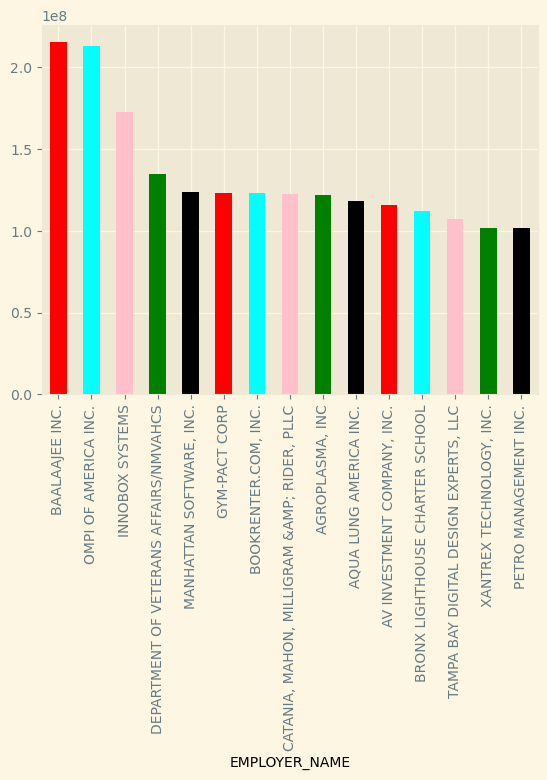

In [28]:
colors = ["red", "cyan", "pink", "green", "black"]
df.groupby("EMPLOYER_NAME")["PREVAILING_WAGE"].median().sort_values(ascending=False)[:15].plot(kind="bar", color=colors)
plt.show()

### Top 20 WORKSITE 

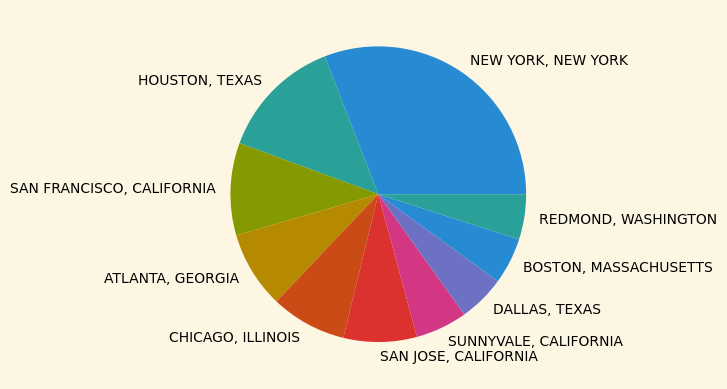

In [29]:
# apply percentage
ans = (df["WORKSITE"].value_counts()[:10]/df.shape[0])*100
labels = ans.index
values = ans.values
plt.pie(values, labels=labels)
plt.show()


In [30]:
df["WORKSITE"].value_counts().head(20)

NEW YORK, NEW YORK            190863
HOUSTON, TEXAS                 83385
SAN FRANCISCO, CALIFORNIA      62457
ATLANTA, GEORGIA               52008
CHICAGO, ILLINOIS              51167
SAN JOSE, CALIFORNIA           49582
SUNNYVALE, CALIFORNIA          34968
DALLAS, TEXAS                  31509
BOSTON, MASSACHUSETTS          31336
REDMOND, WASHINGTON            30574
CHARLOTTE, NORTH CAROLINA      30176
IRVING, TEXAS                  29316
MOUNTAIN VIEW, CALIFORNIA      29245
SAN DIEGO, CALIFORNIA          28656
SANTA CLARA, CALIFORNIA        27945
JERSEY CITY, NEW JERSEY        26822
SEATTLE, WASHINGTON            26745
AUSTIN, TEXAS                  26695
LOS ANGELES, CALIFORNIA        26393
PHILADELPHIA, PENNSYLVANIA     24104
Name: WORKSITE, dtype: int64

<Axes: xlabel='WORKSITE'>

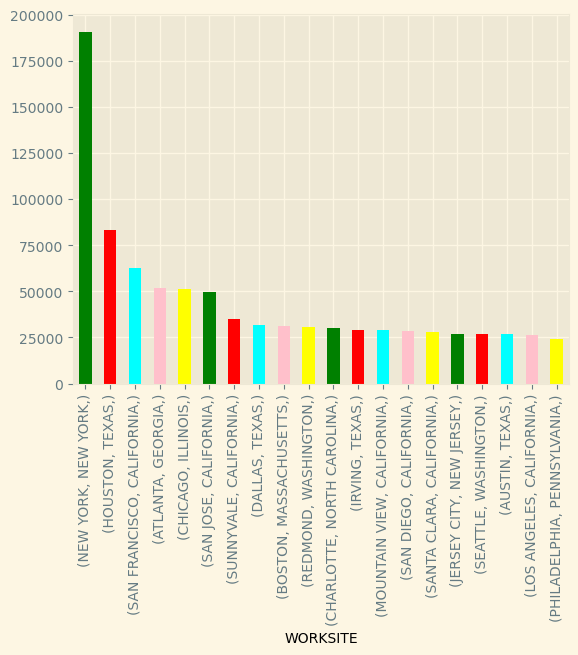

In [31]:
colors = ["green", "red", "cyan", "pink", "yellow"]
plots = df[["WORKSITE"]].value_counts().head(20)
plots.plot(kind="bar", color=colors)

### head of Worksite Column

In [32]:
df["WORKSITE"].head()

0        ANN ARBOR, MICHIGAN
1               PLANO, TEXAS
2    JERSEY CITY, NEW JERSEY
3           DENVER, COLORADO
4        ST. LOUIS, MISSOURI
Name: WORKSITE, dtype: object

### Show Column Names

In [33]:
df.columns

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

### Apply a Function on DataFrame to gather only State Name from Worksite

    eg. worksite name current -  SAN FRANCISCO, CALIFORNIA
        worksite name after - CALIFORNIA
        
**note**: there sholud not be any space at the begning or end of worksite name

In [34]:
xx = pd.DataFrame({"salary": np.random.randint(10000, 50000, 10), "rating": np.random.choice(["good", "avg", "bad"], 10)})

In [35]:
xx

,salary,rating
0,36762,good
1,26014,avg
2,38915,good
3,10600,avg
4,23232,good
5,48287,avg
6,28151,bad
7,45247,bad
8,20567,good
9,14292,good


In [36]:
xx["rating_values"] = xx["rating"].map({"bad": 1, "avg": 3, "good": 5})

In [37]:
xx

,salary,rating,rating_values
0,36762,good,5
1,26014,avg,3
2,38915,good,5
3,10600,avg,3
4,23232,good,5
5,48287,avg,3
6,28151,bad,1
7,45247,bad,1
8,20567,good,5
9,14292,good,5


In [38]:
df["WORKSITE"].unique()[:10]

array(['ANN ARBOR, MICHIGAN', 'PLANO, TEXAS', 'JERSEY CITY, NEW JERSEY',
       'DENVER, COLORADO', 'ST. LOUIS, MISSOURI', 'MIAMI, FLORIDA',
       'HOUSTON, TEXAS', 'SAN JOSE, CALIFORNIA', 'VIENNA, VIRGINIA',
       'PITTSBURGH, PENNSYLVANIA'], dtype=object)

In [39]:
def get_state(worksite_name):
    return worksite_name.split(",")[-1].upper()

In [40]:
ans = df["WORKSITE"].apply(get_state)

In [41]:
ans

0                MICHIGAN
1                   TEXAS
2              NEW JERSEY
3                COLORADO
4                MISSOURI
                ...      
2877760        CALIFORNIA
2877761              UTAH
2877762              OHIO
2877763     MASSACHUSETTS
2877764     MASSACHUSETTS
Name: WORKSITE, Length: 2877765, dtype: object

In [42]:
df["WORKSITE"] = df["WORKSITE"].apply(lambda worksite: worksite.split(',')[1])

In [43]:
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,MICHIGAN,-83.743038,42.280826
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,TEXAS,-96.698886,33.019843
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,NEW JERSEY,-74.077642,40.728158
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,COLORADO,-104.990251,39.739236
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,MISSOURI,-90.199404,38.627003


**note:** if you view your analysis than you will find that 'MARIANA ISLANDS' worksite name is replaced with NA values

### Replace all NA records in your Worksite Column with Value  'MARIANA ISLANDS' 


In [44]:
ans.unique()

array([' MICHIGAN', ' TEXAS', ' NEW JERSEY', ' COLORADO', ' MISSOURI',
       ' FLORIDA', ' CALIFORNIA', ' VIRGINIA', ' PENNSYLVANIA',
       ' WISCONSIN', ' ILLINOIS', ' DISTRICT OF COLUMBIA',
       ' NORTH CAROLINA', ' RHODE ISLAND', ' OHIO', ' WASHINGTON',
       ' GEORGIA', ' NEW YORK', ' INDIANA', ' MARYLAND', ' MASSACHUSETTS',
       ' NEVADA', ' NEW HAMPSHIRE', ' LOUISIANA', ' MINNESOTA',
       ' SOUTH CAROLINA', ' ARIZONA', ' TENNESSEE', ' HAWAII', ' UTAH',
       ' DELAWARE', ' NA', ' KANSAS', ' CONNECTICUT', ' MAINE',
       ' OKLAHOMA', ' ARKANSAS', ' PUERTO RICO', ' ALASKA', ' IOWA',
       ' OREGON', ' KENTUCKY', ' NEBRASKA', ' NEW MEXICO',
       ' WEST VIRGINIA', ' SOUTH DAKOTA', ' NORTH DAKOTA', ' MISSISSIPPI',
       ' ALABAMA', ' VERMONT', ' IDAHO', ' WYOMING', ' MONTANA'],
      dtype=object)

In [45]:
ans.unique().shape

(53,)

In [46]:
df.loc[df["WORKSITE"]==" NA", "WORKSITE"] = 'MARIANA ISLANDS'

In [47]:
df["WORKSITE"].unique()

array([' MICHIGAN', ' TEXAS', ' NEW JERSEY', ' COLORADO', ' MISSOURI',
       ' FLORIDA', ' CALIFORNIA', ' VIRGINIA', ' PENNSYLVANIA',
       ' WISCONSIN', ' ILLINOIS', ' DISTRICT OF COLUMBIA',
       ' NORTH CAROLINA', ' RHODE ISLAND', ' OHIO', ' WASHINGTON',
       ' GEORGIA', ' NEW YORK', ' INDIANA', ' MARYLAND', ' MASSACHUSETTS',
       ' NEVADA', ' NEW HAMPSHIRE', ' LOUISIANA', ' MINNESOTA',
       ' SOUTH CAROLINA', ' ARIZONA', ' TENNESSEE', ' HAWAII', ' UTAH',
       ' DELAWARE', 'MARIANA ISLANDS', ' KANSAS', ' CONNECTICUT',
       ' MAINE', ' OKLAHOMA', ' ARKANSAS', ' PUERTO RICO', ' ALASKA',
       ' IOWA', ' OREGON', ' KENTUCKY', ' NEBRASKA', ' NEW MEXICO',
       ' WEST VIRGINIA', ' SOUTH DAKOTA', ' NORTH DAKOTA', ' MISSISSIPPI',
       ' ALABAMA', ' VERMONT', ' IDAHO', ' WYOMING', ' MONTANA'],
      dtype=object)

### Print out how many unique Worksites are there

In [48]:
df['WORKSITE'].value_counts().head()

 CALIFORNIA    548539
 TEXAS         286704
 NEW YORK      282429
 NEW JERSEY    206876
 ILLINOIS      154843
Name: WORKSITE, dtype: int64

##### show column names 

In [49]:
df.columns

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

#### Rename you column names as

    {'EMPLOYER_NAME':'EMPLOYER','FULL_TIME_POSITION':'FULL_T','PREVAILING_WAGE':'PREV_WAGE','WORKSITE':'STATE','lon':'LON','lat':'LAT'}

In [50]:
df.rename(
    {'EMPLOYER_NAME':'EMPLOYER',
     'FULL_TIME_POSITION':'FULL_T',
     'PREVAILING_WAGE':'PREV_WAGE',
     'WORKSITE':'STATE',
     'lon':'LON',
     'lat':'LAT'},
    axis=1,
    inplace = True
)

In [51]:
df

,CASE_STATUS,EMPLOYER,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,YEAR,STATE,LON,LAT
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,MICHIGAN,-83.743038,42.280826
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,TEXAS,-96.698886,33.019843
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,NEW JERSEY,-74.077642,40.728158
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,COLORADO,-104.990251,39.739236
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,MISSOURI,-90.199404,38.627003
...,...,...,...,...,...,...,...,...,...,...
2877760,WITHDRAWN,"ORACLE AMERICA, INC.","Software Developers, Applications",SOFTWARE ENGINEER (SOFTWARE DEVELOPER 2),Y,64800.0,2011.0,CALIFORNIA,-122.245536,37.536413
2877761,WITHDRAWN,B & D DENTAL CORP.,Materials Scientists,MATERIALS SCIENTIST,N,70553.6,2011.0,UTAH,-112.001050,40.691613
2877762,WITHDRAWN,"MEDTECH STAFFING & SOLUTIONS, INC",Market Research Analysts and Marketing Special...,MARKET RESEARCH ANALYST,Y,33800.0,2011.0,OHIO,-81.519005,41.081445
2877763,WITHDRAWN,LARSEN & TOUBRO LIMITED,Commercial and Industrial Designers,DESIGN ENGINEER,Y,59800.0,2011.0,MASSACHUSETTS,-71.367284,42.599814


#### Now Remove all Columns Except these columns 

    'CASE_STATUS','YEAR','STATE','SOC_NAME','JOB_TITLE','FULL_T','PREV_WAGE','EMPLOYER','LON',"LAT"

In [52]:
new_df = df.loc[:, ['STATE','EMPLOYER','PREV_WAGE','CASE_STATUS','YEAR','SOC_NAME','JOB_TITLE','FULL_T','LON',"LAT"]]

In [53]:
new_df.columns

Index(['STATE', 'EMPLOYER', 'PREV_WAGE', 'CASE_STATUS', 'YEAR', 'SOC_NAME',
       'JOB_TITLE', 'FULL_T', 'LON', 'LAT'],
      dtype='object')

In [54]:
new_df.head()

,STATE,EMPLOYER,PREV_WAGE,CASE_STATUS,YEAR,SOC_NAME,JOB_TITLE,FULL_T,LON,LAT
0,MICHIGAN,UNIVERSITY OF MICHIGAN,36067.0,CERTIFIED-WITHDRAWN,2016.0,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,-83.743038,42.280826
1,TEXAS,"GOODMAN NETWORKS, INC.",242674.0,CERTIFIED-WITHDRAWN,2016.0,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,-96.698886,33.019843
2,NEW JERSEY,"PORTS AMERICA GROUP, INC.",193066.0,CERTIFIED-WITHDRAWN,2016.0,CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,-74.077642,40.728158
3,COLORADO,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",220314.0,CERTIFIED-WITHDRAWN,2016.0,CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,-104.990251,39.739236
4,MISSOURI,PEABODY INVESTMENTS CORP.,157518.4,WITHDRAWN,2016.0,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,-90.199404,38.627003


__show colnames__

In [55]:
df.columns

Index(['CASE_STATUS', 'EMPLOYER', 'SOC_NAME', 'JOB_TITLE', 'FULL_T',
       'PREV_WAGE', 'YEAR', 'STATE', 'LON', 'LAT'],
      dtype='object')

#### Perform These Operations 

    Precise LON and LAT columns upto 2 decimal palaces
    
    Convert YEAR Column into String
    
    Convert PREV_WAGE column into Integer

In [56]:
df["YEAR"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2877765 entries, 0 to 2877764
Series name: YEAR
Non-Null Count    Dtype  
--------------    -----  
2877765 non-null  float64
dtypes: float64(1)
memory usage: 22.0 MB


In [57]:
df["YEAR"] = df["YEAR"].astype(str)

In [58]:
df["PREV_WAGE"] = df["PREV_WAGE"].astype(int).round()

In [59]:
# df.info()

In [60]:
df["LAT"] = df["LAT"].round(2)

In [61]:
df["LON"] = df["LON"].round(2)

__show top 3 values to check above operations__

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2877765 entries, 0 to 2877764
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   CASE_STATUS  object 
 1   EMPLOYER     object 
 2   SOC_NAME     object 
 3   JOB_TITLE    object 
 4   FULL_T       object 
 5   PREV_WAGE    int32  
 6   YEAR         object 
 7   STATE        object 
 8   LON          float64
 9   LAT          float64
dtypes: float64(2), int32(1), object(7)
memory usage: 208.6+ MB


In [63]:
df.head(3)

,CASE_STATUS,EMPLOYER,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,YEAR,STATE,LON,LAT
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067,2016.0,MICHIGAN,-83.74,42.28
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674,2016.0,TEXAS,-96.70,33.02
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066,2016.0,NEW JERSEY,-74.08,40.73


### __show unique values of CASE_STATUS Column__

In [64]:
df["CASE_STATUS"].unique()

array(['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED',
       'REJECTED', 'INVALIDATED',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED'], dtype=object)

# Calculate the petitions distributions by status

In [65]:
s = df["CASE_STATUS"].unique()
a = df["CASE_STATUS"].value_counts()
return_list = list(pd.Series(a, s))
return_list

[195721, 84752, 2512114, 85161, 1, 1, 15]

In [66]:
from matplotlib.pyplot import pie,axis,show
import matplotlib as mpl

#### PETITIONS BY CASE STATUS

In [67]:
label = df["CASE_STATUS"].unique()


In [68]:
value = df["CASE_STATUS"].unique()

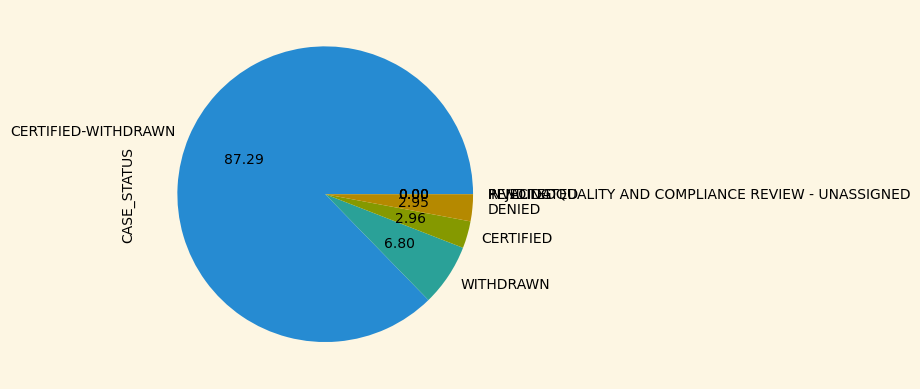

In [69]:

case_counts = df["CASE_STATUS"].value_counts().plot(kind="pie", labels=label, autopct="%.2f")
plt.show()


# Calculating the petitions distributions by year

In [70]:
# assuming the year column is named 'year' and the dataframe is named 'df'
year = df["YEAR"].value_counts()
s = list(year)
s.reverse()
s

[333625, 394267, 422427, 498027, 600120, 629299]

In [71]:
# help(list)

In [72]:
colors = ["green", "pink", "blue", "yellow", "purple", "red"]

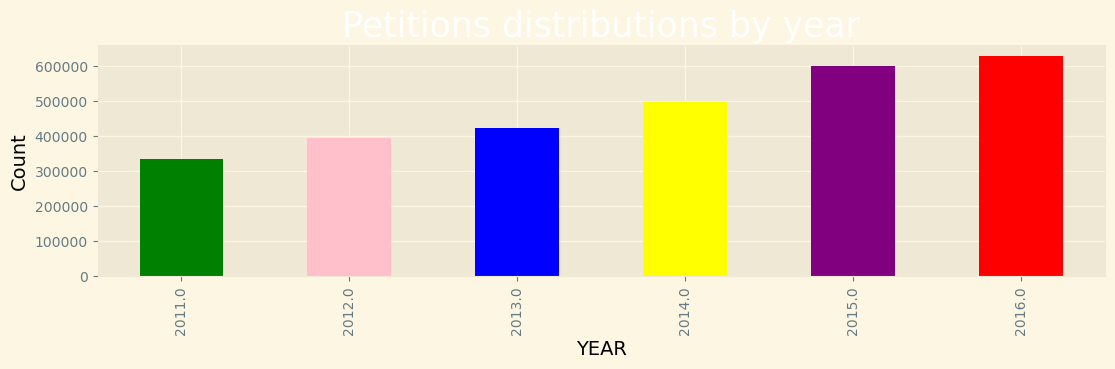

In [73]:
df["YEAR"].value_counts()[::-1].plot(kind="bar", color=colors, figsize=(13, 3))
plt.title("Petitions distributions by year", fontsize=25, color="white")
plt.xlabel("YEAR", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

In [74]:
denied = df[df.CASE_STATUS == 'DENIED']
len(denied)

85161

In [75]:
del denied['CASE_STATUS']

In [76]:
denied = denied.reset_index()
denied.head(3)

,index,EMPLOYER,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,YEAR,STATE,LON,LAT
0,37,"PARALLELS, INC.",CHIEF EXECUTIVES,CHIEF EXECUTIVE OFFICER,Y,187200,2016.0,WASHINGTON,-122.22,47.48
1,44,RANCHO LA PUERTA LLC,CHIEF EXECUTIVES,PRESIDENT,Y,197683,2016.0,CALIFORNIA,-117.16,32.72
2,87,BAKER & MCKENZIE PC,CHIEF EXECUTIVES,PRINCIPAL (ATTORNEY) AND CHAIRMAN OF THE EXECU...,Y,226699,2016.0,ILLINOIS,-87.63,41.88


In [77]:
denied_year_count = [0]* 6

In [78]:
df["CASE_STATUS"].value_counts()["DENIED"]

85161

### Denied PETITIONS DISTRIBUTION BY YEAR

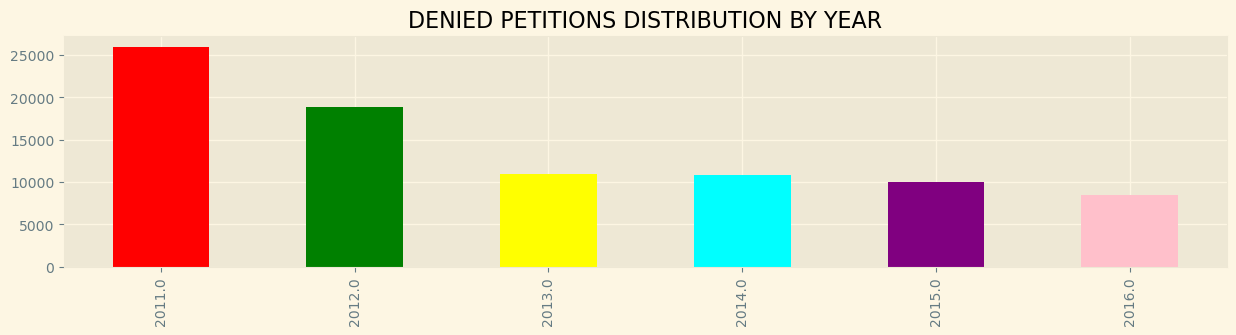

In [79]:
df[(df["CASE_STATUS"]=="DENIED")]["YEAR"].value_counts().plot(kind="bar",title=("DENIED PETITIONS DISTRIBUTION BY YEAR"), figsize=(15, 3), color = ["red", "green", "yellow", "cyan", "purple", "pink"])

plt.show()

#### Denied % Rate By Year

In [80]:
p = df[["CASE_STATUS","YEAR"]]["YEAR"].value_counts()
s =df[(df["CASE_STATUS"]=="DENIED")]["YEAR"].value_counts()
DF = pd.DataFrame(p)
DF2 = pd.DataFrame(s)
new = pd.concat([DF, DF2], axis=1)
new.columns=["ALL", "DENIED"]
sf = new["DENIED"]/new["ALL"]*100
no = pd.DataFrame(sf)
no.columns = ["Denied Ratio %"]
no["Denied Ratio %"] = no["Denied Ratio %"].round(2)

no.T

,2016.0,2015.0,2014.0,2013.0,2012.0,2011.0
Denied Ratio %,1.35,1.67,2.17,2.6,4.79,7.79


<Axes: title={'center': 'Denied % Rate By Year'}>

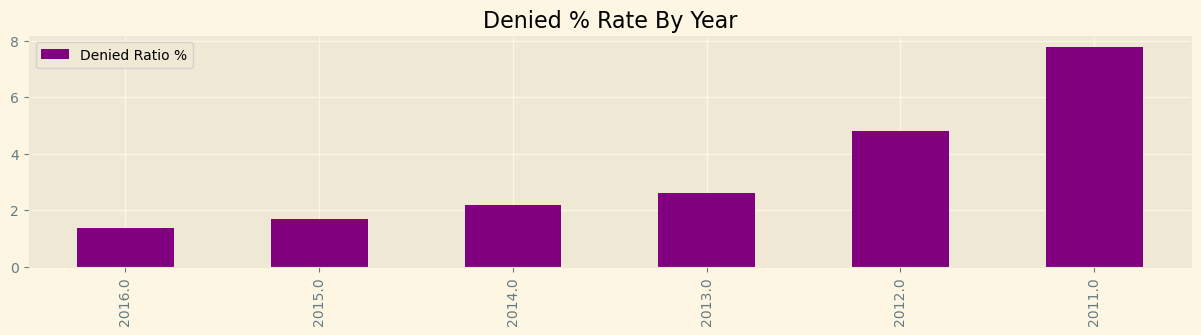

In [81]:
# df["CASE_STATUS"].value_counts()
color = ["green",  "yellow", "cyan", "purple", "pink"]
no.plot(kind="bar", color = "purple", title=("Denied % Rate By Year"), figsize=(15, 3))

## Calculate the number of petitions filed by the States

In [82]:
df.columns

Index(['CASE_STATUS', 'EMPLOYER', 'SOC_NAME', 'JOB_TITLE', 'FULL_T',
       'PREV_WAGE', 'YEAR', 'STATE', 'LON', 'LAT'],
      dtype='object')

**unique stats sorted**

In [83]:
ohh_no = list(df["STATE"].unique())

In [84]:
ohh_no.sort()
print(ohh_no)

[' ALABAMA', ' ALASKA', ' ARIZONA', ' ARKANSAS', ' CALIFORNIA', ' COLORADO', ' CONNECTICUT', ' DELAWARE', ' DISTRICT OF COLUMBIA', ' FLORIDA', ' GEORGIA', ' HAWAII', ' IDAHO', ' ILLINOIS', ' INDIANA', ' IOWA', ' KANSAS', ' KENTUCKY', ' LOUISIANA', ' MAINE', ' MARYLAND', ' MASSACHUSETTS', ' MICHIGAN', ' MINNESOTA', ' MISSISSIPPI', ' MISSOURI', ' MONTANA', ' NEBRASKA', ' NEVADA', ' NEW HAMPSHIRE', ' NEW JERSEY', ' NEW MEXICO', ' NEW YORK', ' NORTH CAROLINA', ' NORTH DAKOTA', ' OHIO', ' OKLAHOMA', ' OREGON', ' PENNSYLVANIA', ' PUERTO RICO', ' RHODE ISLAND', ' SOUTH CAROLINA', ' SOUTH DAKOTA', ' TENNESSEE', ' TEXAS', ' UTAH', ' VERMONT', ' VIRGINIA', ' WASHINGTON', ' WEST VIRGINIA', ' WISCONSIN', ' WYOMING', 'MARIANA ISLANDS']


In [85]:
len(ohh_no)

53

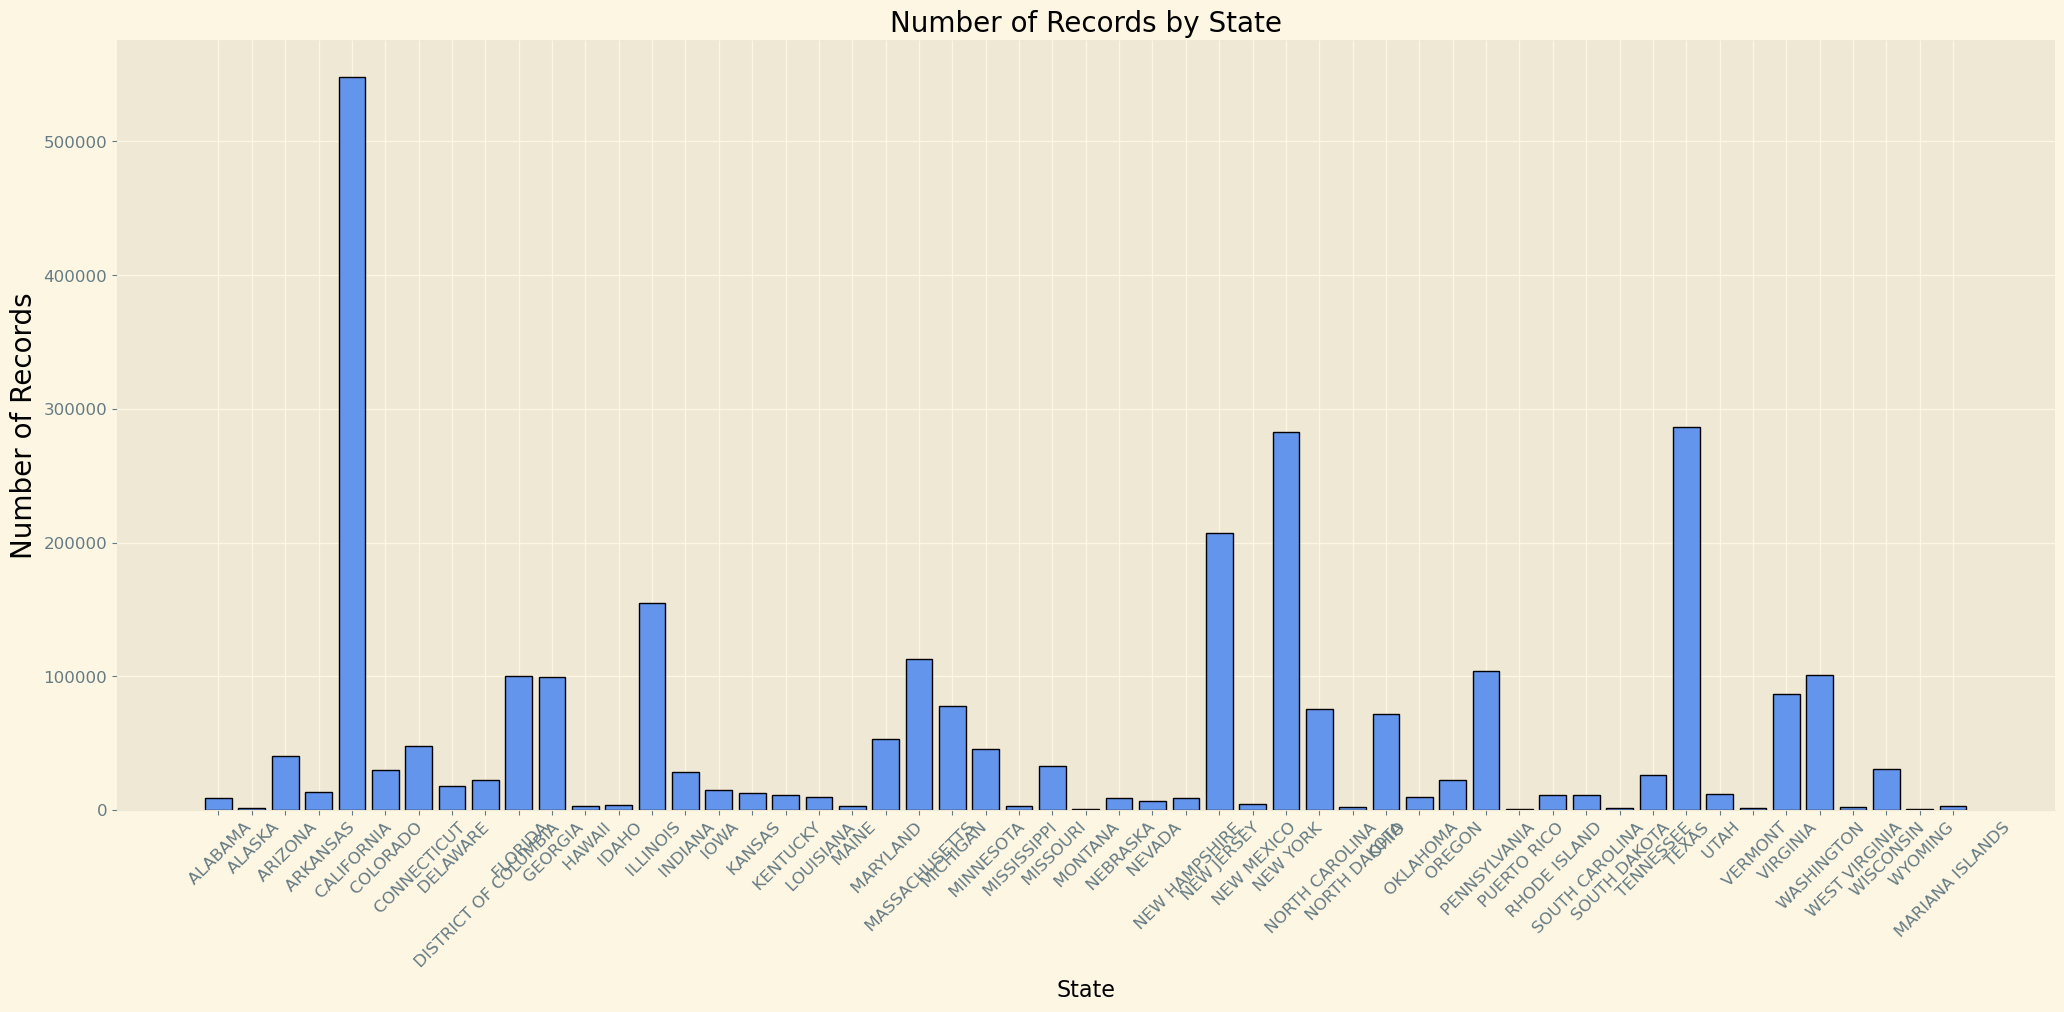

In [86]:
import matplotlib.pyplot as plt

# create a bar plot with custom colors and edge color
fig, ax = plt.subplots(figsize=(25, 10))
ax.bar(df["STATE"].value_counts().sort_index().index, 
       df["STATE"].value_counts().sort_index().values, 
       color="cornflowerblue", edgecolor="black")

# set plot title and axes labels
ax.set_title("Number of Records by State", fontsize=20)
ax.set_xlabel("State", fontsize=16)
ax.set_ylabel("Number of Records", fontsize=20)

# set x-tick labels rotation angle and font size
plt.xticks(rotation=45, fontsize=12)

# set y-tick font size
plt.yticks(fontsize=12)

# remove top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# display the plot
plt.show()


# Number of petitions denied by the state

__total denied petitions__

In [88]:
denied = df[df.CASE_STATUS == 'DENIED']
len(denied)

85161

!!! Great Now Make Your Own Questions and Try to Answer Them !!